In [41]:
import glob
import os
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

path ='E:\\marci main\\bme\\hfizlab2\\01amr\\'

1. feladat: Offset feszültség mérése

E:\marci main\bme\hfizlab2\01amr\1.txt


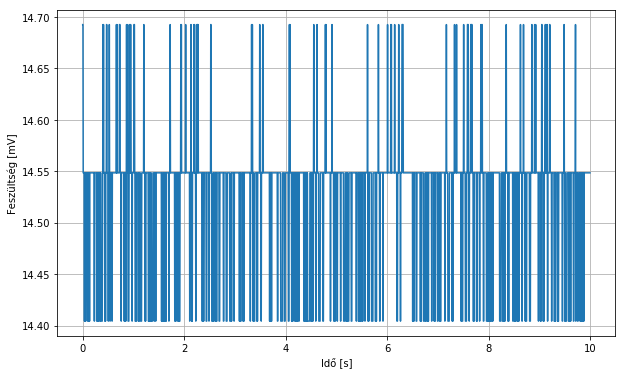

14.52473241531994


In [84]:
j=0
for filename in glob.glob(os.path.join(path, '1*.txt')):
    print(filename)
    i=0
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1]))
                except:
                    print("")

    plt.figure(figsize=(10,6))
    plt.plot(t,v1)
    plt.ylabel("Feszültség [mV]")
    plt.xlabel("Idő [s]")
    plt.grid(True)
    plt.savefig(filename[:-4]+".pdf")
    plt.show()
    
    offset = np.average(v1)
    print(offset)

2. feladat: Térerősség és jel kapcsolata, lineáris közelítés és feltételei

E:\marci main\bme\hfizlab2\01amr\2-05.txt


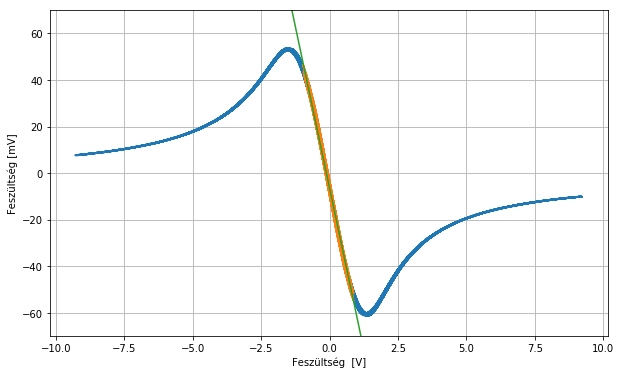

E:\marci main\bme\hfizlab2\01amr\2-10.txt


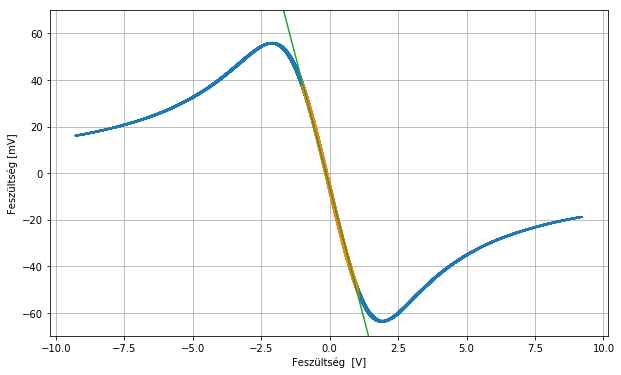

E:\marci main\bme\hfizlab2\01amr\2-15.txt


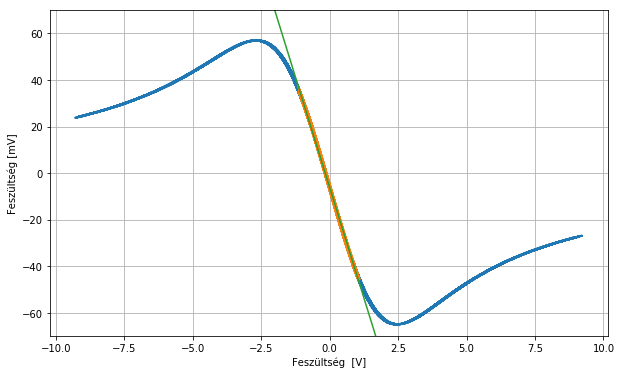

E:\marci main\bme\hfizlab2\01amr\2-20.txt


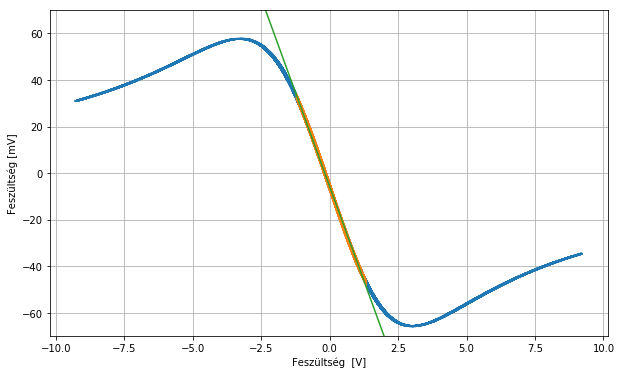

E:\marci main\bme\hfizlab2\01amr\2-25.txt


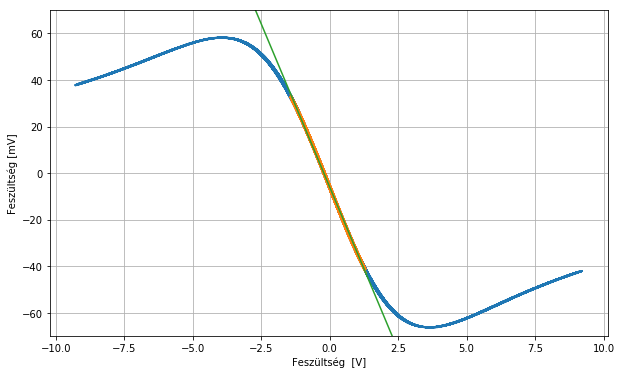

E:\marci main\bme\hfizlab2\01amr\2-30.txt


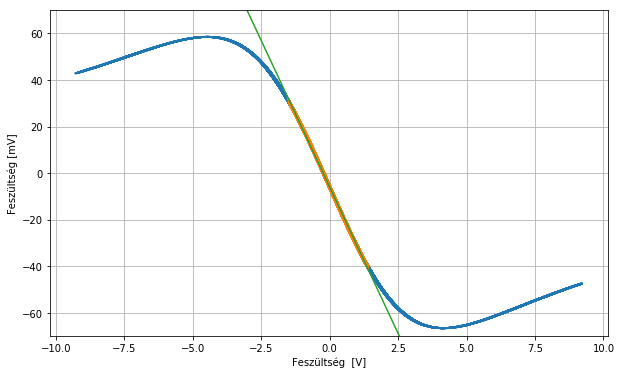

E:\marci main\bme\hfizlab2\01amr\2-35.txt


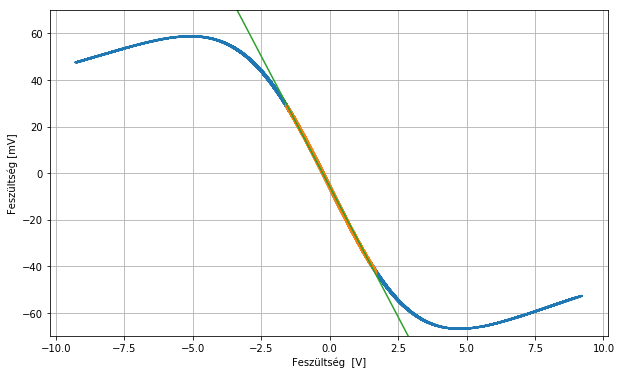

E:\marci main\bme\hfizlab2\01amr\2-40.txt


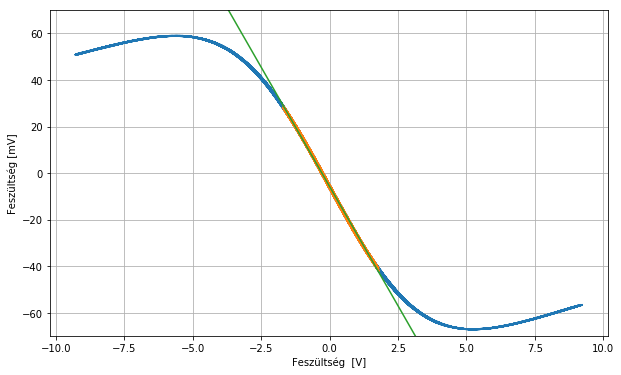

E:\marci main\bme\hfizlab2\01amr\2-45.txt


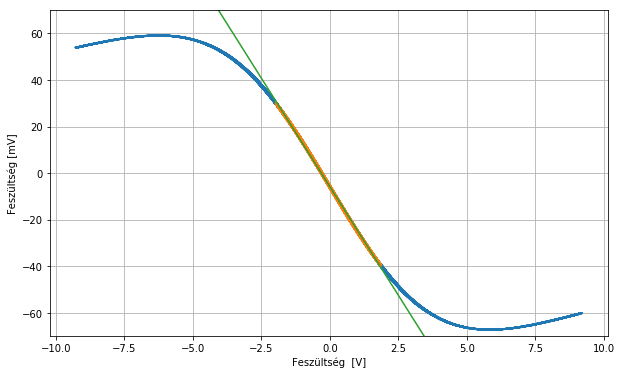

E:\marci main\bme\hfizlab2\01amr\2-50.txt


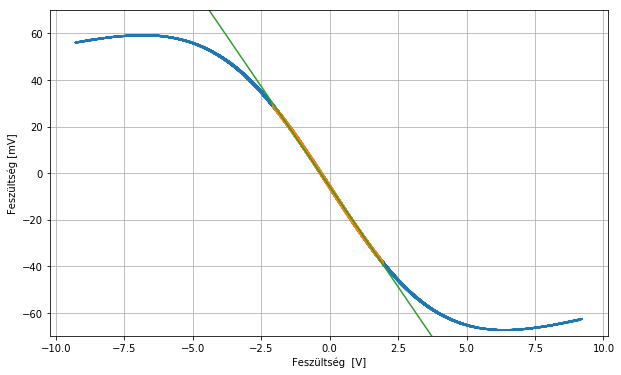

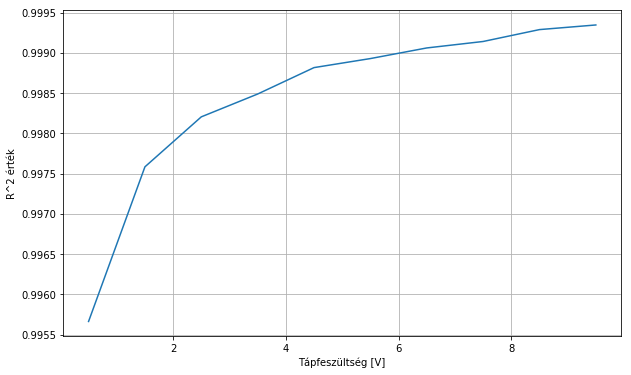

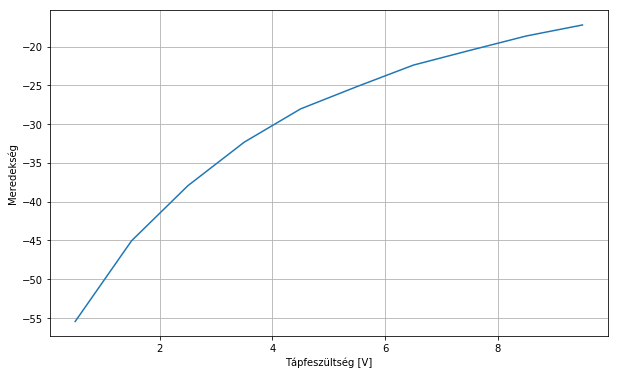

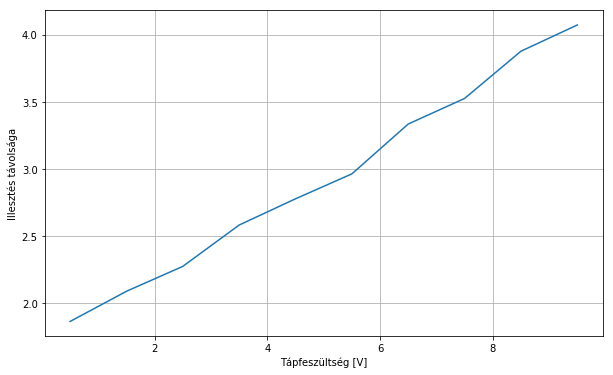

In [111]:
j=0
tap = []
m = []
a = []
b = []
r2s = []
fit_dist = []
for filename in glob.glob(os.path.join(path, '2-*txt')):
    j=j+1
    print(filename)
    i=0
    tap.append(j*0.5)
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    a = float(line.split("\t")[3])
                    #or cut in range(300):
                    #f abs(a)<0.8
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1]))
                    v2.append(float(line.split("\t")[2]))
                    v3.append(float(line.split("\t")[3]))
                except:
                    print("")

    v1 = list(v1 - offset)
    
    plt.figure(figsize=(10,6))
    plt.plot(v3,v1)
    i=0
    prev_r2=0
    prev_a=[]
    for i in range(300):
        #print(i)
        for e in range(10):
            max1 = v3.index(max(v3))
            v3.pop(max1)
            v1.pop(max1)
            min1 = v3.index(min(v3))
            v3.pop(min1)
            v1.pop(min1)
        
        a= stats.linregress(v3,v1)
        r2 = a[2]
        if abs(r2)<prev_r2:
            break
        else:
            prev_a = a
            prev_r2 = abs(r2)
    
    m.append(prev_a[0])
    b.append(prev_a[1])
    r2s.append(abs(prev_a[2]))
    fit_dist.append(max(v3)-min(v3))
    
    plt.plot(v3,v1)
    plt.plot([-5,5],[prev_a[0]*-5+prev_a[1],prev_a[0]*5+prev_a[1]])
    plt.ylabel("Feszültség [mV]")
    plt.xlabel("Feszültség  [V]")
    plt.ylim(-70,70)
    #plt.xlim(-1.70,1.70)
    plt.grid(True)
    plt.savefig(filename[:-4]+".pdf")
    plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,r2s)
plt.ylabel("R^2 érték")
plt.xlabel("Tápfeszültség [V]")
plt.savefig("2-r2.pdf")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,m)
plt.ylabel("Meredekség")
plt.xlabel("Tápfeszültség [V]")
plt.savefig("2-m.pdf")
plt.grid(True)
plt.show()

plt.figure(figsize=(10,6))
plt.plot(tap,fit_dist)
plt.ylabel("Illesztés távolsága")
plt.xlabel("Tápfeszültség [V]")
plt.savefig("2-fit_dist.pdf")
plt.grid(True)
plt.show()

3. Feladat: 

E:\marci main\bme\hfizlab2\01amr\3-0.txt


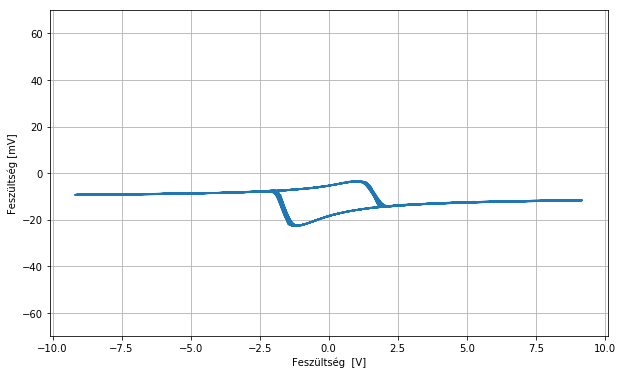

E:\marci main\bme\hfizlab2\01amr\3-05.txt


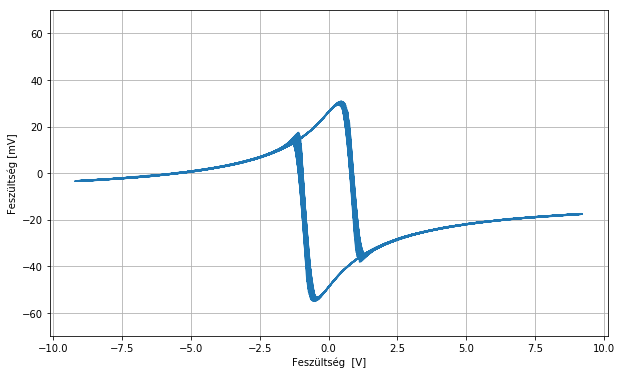

E:\marci main\bme\hfizlab2\01amr\3-10.txt


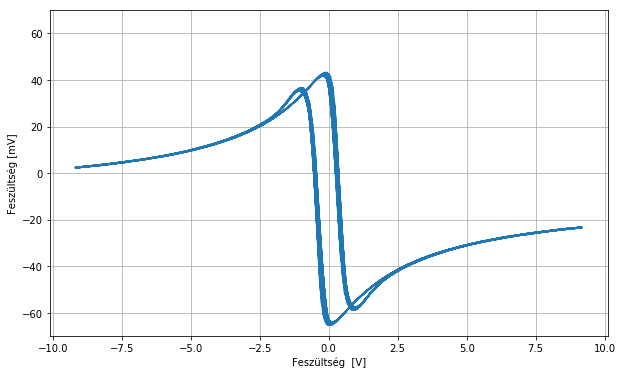

E:\marci main\bme\hfizlab2\01amr\3-15.txt


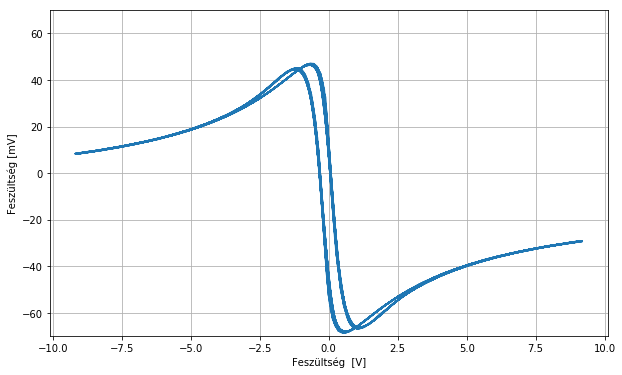

E:\marci main\bme\hfizlab2\01amr\3-20.txt


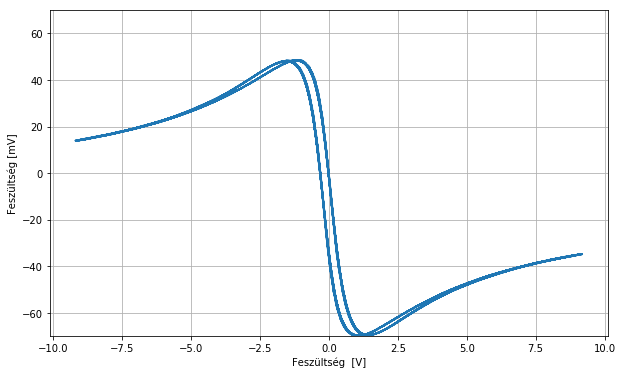

E:\marci main\bme\hfizlab2\01amr\3-25.txt


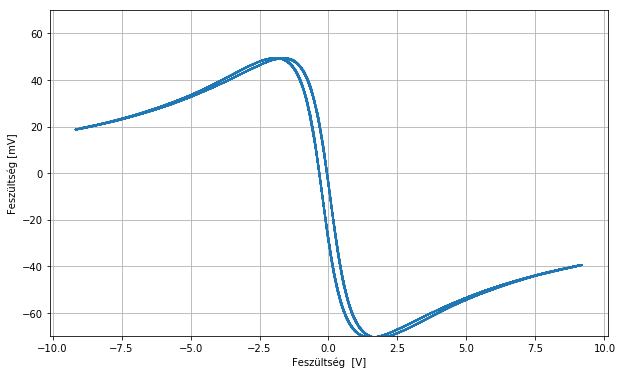

E:\marci main\bme\hfizlab2\01amr\3-30.txt


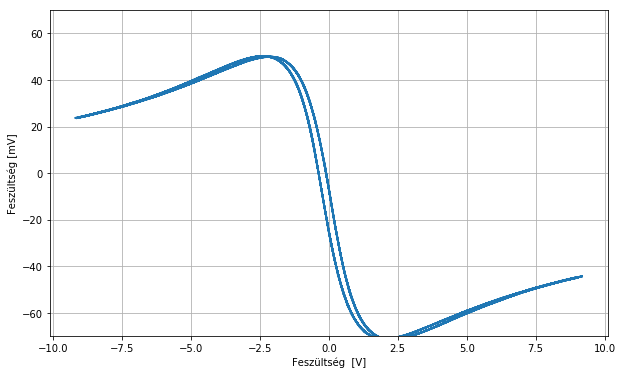

E:\marci main\bme\hfizlab2\01amr\3-35.txt


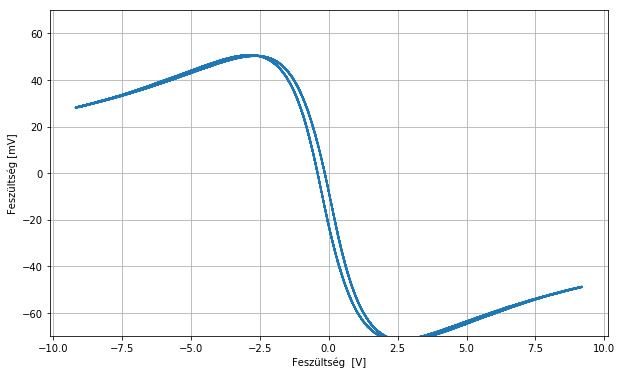

E:\marci main\bme\hfizlab2\01amr\3-40.txt


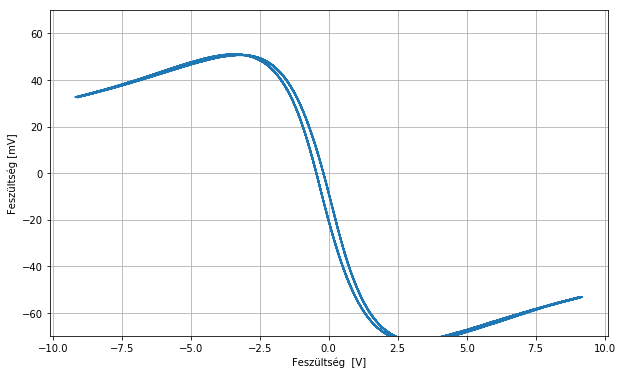

E:\marci main\bme\hfizlab2\01amr\3-45.txt


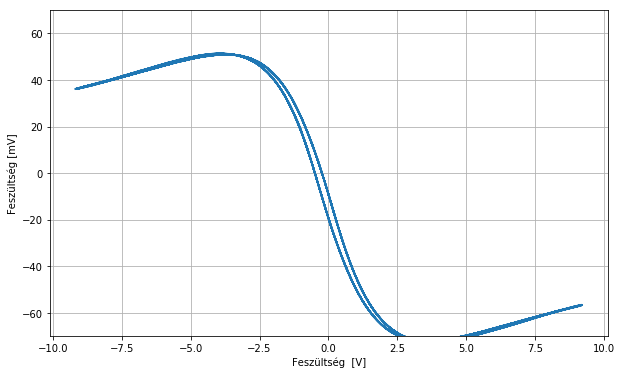

E:\marci main\bme\hfizlab2\01amr\3-50.txt


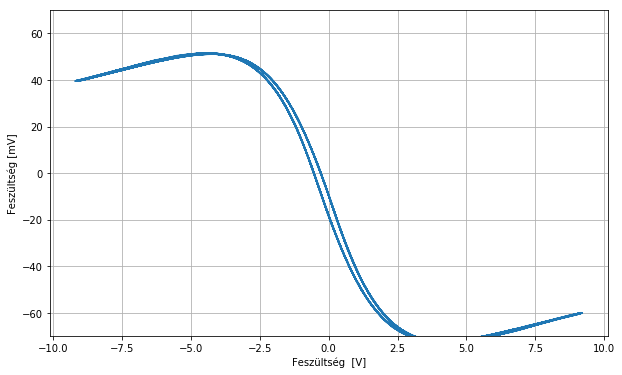

In [113]:
j=0
tap = []
for filename in glob.glob(os.path.join(path, '3-*txt')):
    j=j+1
    print(filename)
    i=0
    tap.append(j*0.5)
    t = []
    v1 = []
    v2 = []
    v3 = []
    with open(filename) as f:
        j=j+1
        for line in f:
            i=i+1
            if i>7:
                try:
                    a = float(line.split("\t")[3])
                    #or cut in range(300):
                    #f abs(a)<0.8
                    t.append(float(line.split("\t")[0]))
                    v1.append(float(line.split("\t")[1])-offset)
                    v2.append(float(line.split("\t")[2]))
                    v3.append(float(line.split("\t")[3]))
                except:
                    print("")

    v1 = list(v1 - offset)
    
    plt.figure(figsize=(10,6))
    plt.plot(v3,v1)
    plt.ylabel("Feszültség [mV]")
    plt.xlabel("Feszültség  [V]")
    plt.ylim(-70,70)
    #plt.xlim(-1.70,1.70)
    plt.grid(True)
    plt.savefig(filename[:-4]+".pdf")
    plt.show()